In [58]:
import warnings
warnings.filterwarnings('ignore')

In [59]:
import numpy as np
import pandas as pd

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [61]:
burnoutDF=pd.read_csv("/content/Employee Burnout Analysis and Prediction.csv")

In [62]:
burnoutDF.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [63]:
burnoutDF["Date of Joining"]=pd.to_datetime(burnoutDF["Date of Joining"])

In [64]:
burnoutDF.shape

(22750, 9)

In [65]:
burnoutDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  float64       
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 1.6+ MB


In [66]:
burnoutDF.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [67]:
burnoutDF.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [68]:
burnoutDF.duplicated().sum()

0

In [69]:
burnoutDF.describe()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750.000000,21369.000000,20633.000000,21626.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000
std,NaN,1.135145,2.047211,1.920839,0.198226


In [70]:
for i,col in enumerate(burnoutDF.columns):
    print(f"\n\n{burnoutDF[col].unique()}")
    print(f"\n{burnoutDF[col].value_counts()}\n\n")



['fffe32003000360033003200' 'fffe3700360033003500'
 'fffe31003300320037003900' ... 'fffe390032003000'
 'fffe33003300320036003900' 'fffe3400350031003800']

Employee ID
fffe32003000360033003200    1
fffe3600360035003500        1
fffe3800360034003400        1
fffe31003000310033003600    1
fffe31003400350031003700    1
                           ..
fffe33003400340032003400    1
fffe32003100370036003600    1
fffe31003900310035003800    1
fffe32003400320034003200    1
fffe3400350031003800        1
Name: count, Length: 22750, dtype: int64




<DatetimeArray>
['2008-09-30 00:00:00', '2008-11-30 00:00:00', '2008-03-10 00:00:00',
 '2008-11-03 00:00:00', '2008-07-24 00:00:00', '2008-11-26 00:00:00',
 '2008-01-02 00:00:00', '2008-10-31 00:00:00', '2008-12-27 00:00:00',
 '2008-03-09 00:00:00',
 ...
 '2008-05-24 00:00:00', '2008-06-10 00:00:00', '2008-03-31 00:00:00',
 '2008-12-01 00:00:00', '2008-01-05 00:00:00', '2008-09-15 00:00:00',
 '2008-12-10 00:00:00', '2008-02-10 00:00:00', '2008-12-03 00

In [71]:
burnoutDF=burnoutDF.drop(["Employee ID"],axis=1)

In [72]:
intfloatburnoutDf = burnoutDF.select_dtypes([np.int64, np.float64])

for i, col in enumerate(intfloatburnoutDf.columns):
    skew_value = intfloatburnoutDf[col].skew()
    if skew_value >= 0.1:
        print(f"\n{col} feature is positively skewed and value is: {skew_value}")
    elif skew_value <= -0.1:
        print(f"\n{col} feature is negatively skewed and value is: {skew_value}")
    else:
        print(f"\n{col} feature is not significantly skewed and value is: {skew_value}")



Designation feature is not significantly skewed and value is: 0.09242138478903683

Resource Allocation feature is positively skewed and value is: 0.20457273454318103

Mental Fatigue Score feature is negatively skewed and value is: -0.4308950578815428

Burn Rate feature is not significantly skewed and value is: 0.045737370909640515


In [73]:
burnoutDF['Resource Allocation'].fillna(burnoutDF["Resource Allocation"].mean(),inplace=True)
burnoutDF['Mental Fatigue Score'].fillna(burnoutDF["Mental Fatigue Score"].mean(),inplace=True)
burnoutDF['Burn Rate'].fillna(burnoutDF["Burn Rate"].mean(),inplace=True)

In [74]:
burnoutDF.isna().sum()

Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [75]:
# Select only numeric columns
numeric_burnoutDF = burnoutDF.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_burnoutDF.corr()

# Display the correlation matrix
print(correlation_matrix)


                      Designation  Resource Allocation  Mental Fatigue Score  \
Designation              1.000000             0.852046              0.656445   
Resource Allocation      0.852046             1.000000              0.739268   
Mental Fatigue Score     0.656445             0.739268              1.000000   
Burn Rate                0.719284             0.811062              0.878217   

                      Burn Rate  
Designation            0.719284  
Resource Allocation    0.811062  
Mental Fatigue Score   0.878217  
Burn Rate              1.000000  


# VISUALISATION

In [76]:
numeric_burnoutDF = burnoutDF.select_dtypes(include=[np.number])
corr = numeric_burnoutDF.corr()

# Set the figure size using seaborn
sns.set(rc={'figure.figsize': (14, 12)})

# Create the heatmap using plotly
fig = px.imshow(corr, text_auto=True, aspect="auto")

# Show the plot
fig.show()

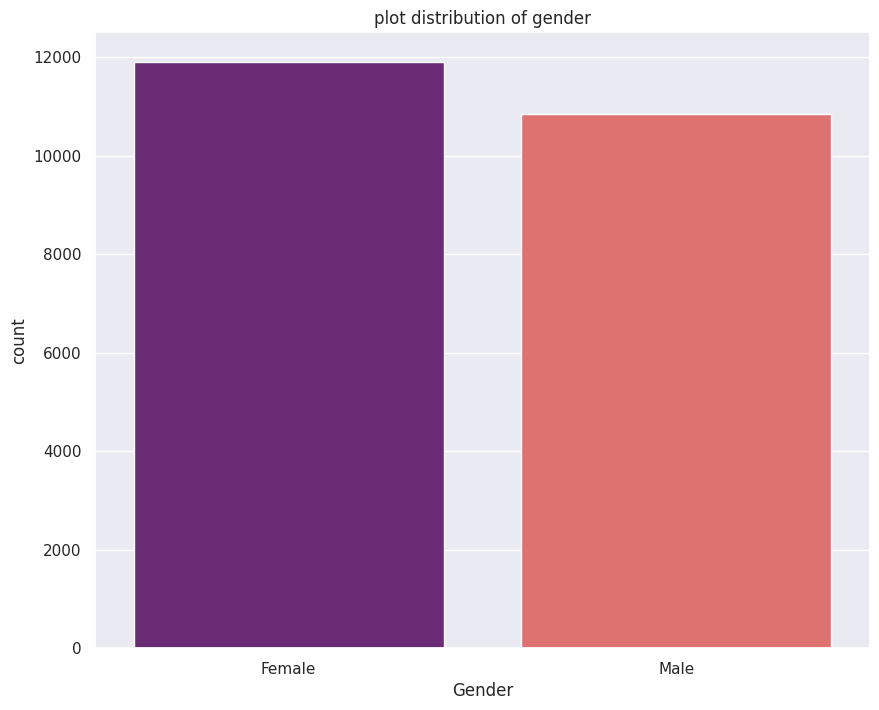

In [77]:
plt.figure(figsize=(10,8))
sns.countplot(x="Gender",data=burnoutDF,palette="magma")
plt.title("plot distribution of gender")
plt.show()

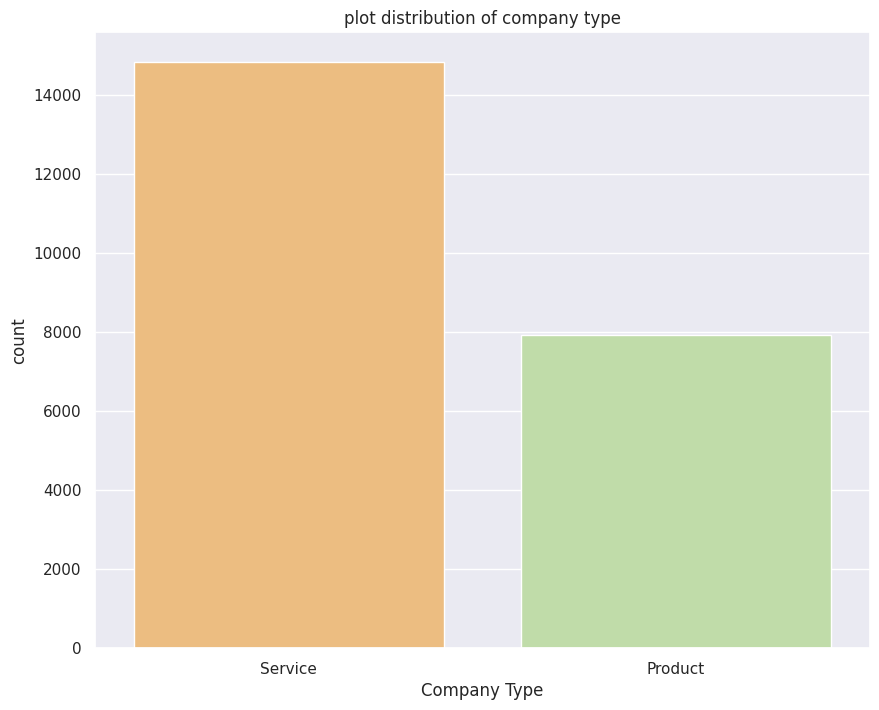

In [78]:
plt.figure(figsize=(10,8))
sns.countplot(x="Company Type",data=burnoutDF,palette="Spectral")
plt.title("plot distribution of company type")
plt.show()

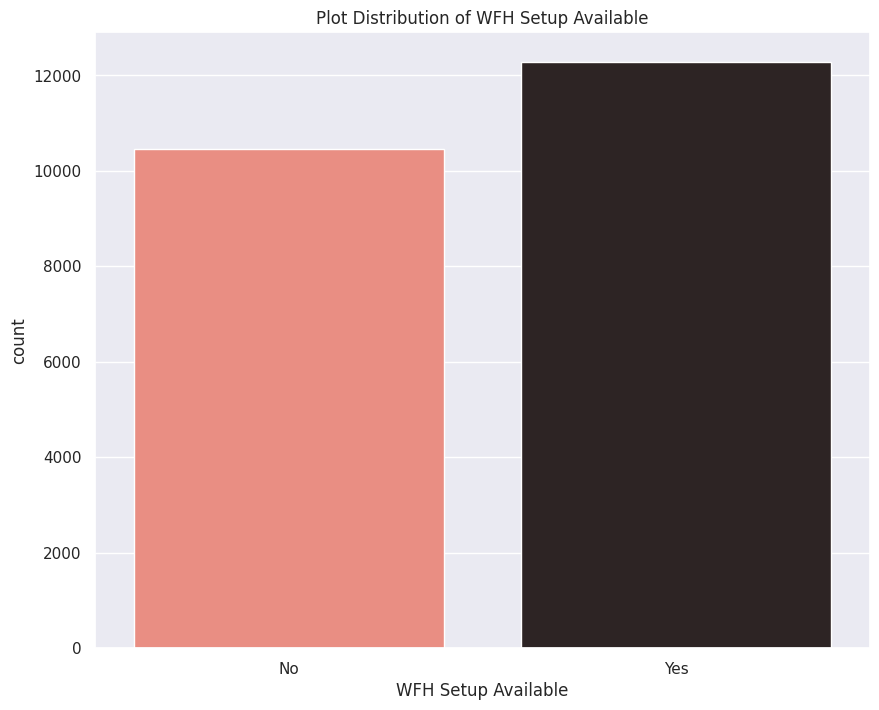

In [79]:
# To Set plot size
plt.figure(figsize=(10, 8))

# Creating count plot
sns.countplot(x="WFH Setup Available", data=burnoutDF, palette="dark:salmon_r")

#title to the plot
plt.title("Plot Distribution of WFH Setup Available")

# Displaying plot
plt.show()

In [80]:
# Select columns from 'Date of Joining' to 'Burn Rate'
burn_st = burnoutDF.loc[:, 'Date of Joining':'Burn Rate']

# Filtering for numeric columns (int and float)
burn_st = burn_st.select_dtypes(include=[int, float])

# Iterate over each column and create a histogram
''' what is a hisogramm?
Ans:A histogram is a type of bar graph that represents the frequency distribution of a dataset.
It is used to visualize the distribution of numerical data and provides an estimate of the probability
distribution of a continuous variable.
'''

for i, col in enumerate(burn_st.columns):
    fig = px.histogram(burn_st, x=col, title=f"Plot Distribution of {col}", color_discrete_sequence=['indianred'])
    fig.update_layout(bargap=0.2)
    fig.show()

In [81]:
# Plot distribution of Burn rate on the basis of Designation
fig = px.line(burnoutDF, y="Burn Rate", color="Designation", title="Burn rate on the basis of Designation",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout (bargap=0.1)
fig.show()

In [82]:
# Plot distribution of Burn rate on the basis of Designation
fig = px.line(burnoutDF, y="Burn Rate", color="Gender", title="Burn rate on the basis of gender",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout (bargap=0.1)
fig.show()

In [83]:
# Plot distribution of Burn rate on the basis of Designation
fig = px.line(burnoutDF, y="Mental Fatigue Score", color="Designation", title="Burn rate on the basis of Designation",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout (bargap=0.2)
fig.show()

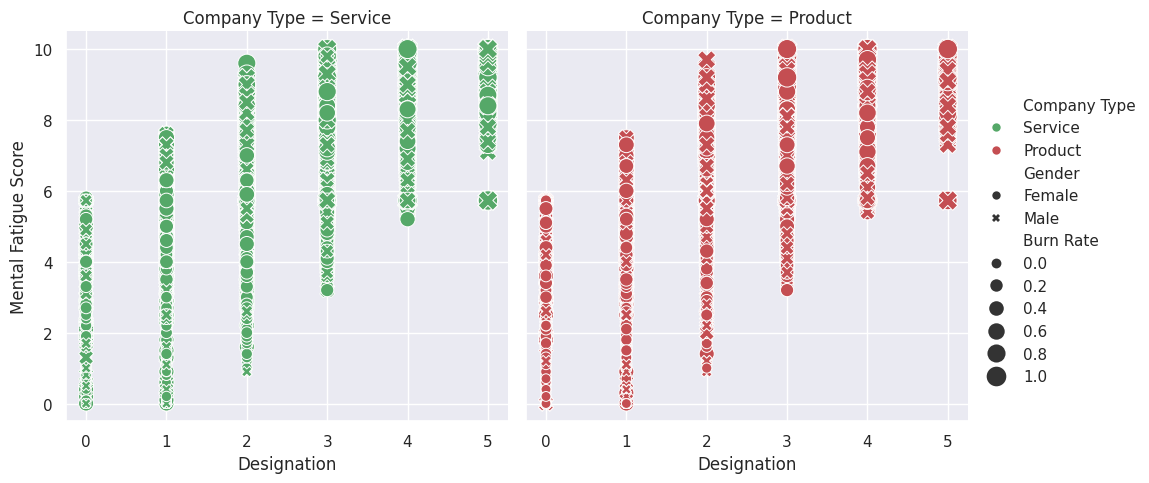

In [84]:
sns.relplot(data=burnoutDF,x="Designation",y="Mental Fatigue Score",col="Company Type",hue="Company Type",size="Burn Rate",style="Gender",palette=["g","r"],sizes=(50,200))

In [85]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()



In [86]:
# Transform 'Gender' column and add as a new column
burnoutDF["Genderlabel"] = l.fit_transform(burnoutDF['Gender'].values)

# Transform 'Company Type' column and add as a new column
burnoutDF["company_typelabel"] = l.fit_transform(burnoutDF['Company Type'].values)

# Transform 'WFH Setup Available' column and add as a new column
burnoutDF["WFH_Setup_AvailableLABEL"] = l.fit_transform(burnoutDF['WFH Setup Available'].values)



In [87]:
# Group by the 'Gender' column and get the first entry for each group
gn = burnoutDF.groupby("Gender")
gn = gn["Genderlabel"]
print(gn.first())

Gender
Female    0
Male      1
Name: Genderlabel, dtype: int64


In [88]:
# Group the DataFrame by the 'Company Type' column
gn = burnoutDF.groupby("Company Type")

# Select the 'company_typelabel' column from each group
gn = gn["company_typelabel"]

# Get the first entry of the 'company_typelabel' column for each 'Company Type' group
gn.first()

Company Type
Product    0
Service    1
Name: company_typelabel, dtype: int64

In [89]:
# Group the DataFrame by the 'WFH Setup Available' column
gn = burnoutDF.groupby("WFH Setup Available")

# Select the 'WFH_Setup_AvailableLABEL' column from each group
gn = gn["WFH_Setup_AvailableLABEL"]

# Get the first entry of the 'WFH_Setup_AvailableLABEL' column for each 'WFH Setup Available' group
gn.first()

WFH Setup Available
No     0
Yes    1
Name: WFH_Setup_AvailableLABEL, dtype: int64

In [90]:
burnoutDF.tail(10)

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Genderlabel,company_typelabel,WFH_Setup_AvailableLABEL
22740,2008-09-05,Female,Product,No,3.0,6.0,7.300000,0.550000,0,0,0
22741,2008-01-07,Male,Product,No,2.0,5.0,6.000000,0.452005,1,0,0
22742,2008-07-28,Male,Product,No,3.0,5.0,8.100000,0.690000,1,0,0
22743,2008-12-15,Female,Product,Yes,1.0,3.0,6.000000,0.480000,0,0,1
22744,2008-05-27,Male,Product,No,3.0,7.0,6.200000,0.540000,1,0,0
22745,2008-12-30,Female,Service,No,1.0,3.0,5.728188,0.410000,0,1,0
22746,2008-01-19,Female,Product,Yes,3.0,6.0,6.700000,0.590000,0,0,1
22747,2008-11-05,Male,Service,Yes,3.0,7.0,5.728188,0.720000,1,1,1
22748,2008-01-10,Female,Service,No,2.0,5.0,5.900000,0.520000,0,1,0
22749,2008-01-06,Male,Product,No,3.0,6.0,7.800000,0.610000,1,0,0


# FEATURE SELECTION

In [91]:
# Defining the columns for feature selection
Columns = ['Designation', 'Resource Allocation', 'Mental Fatigue Score', 'Genderlabel', 'company_typelabel', 'WFH_Setup_AvailableLABEL']

# Extracting the feature variables (X) from the DataFrame using the specified columns
X = burnoutDF[Columns]

# Extracting the target variable (y) from the DataFrame, which represents the burnout rate
y = burnoutDF['Burn Rate']


In [92]:
print(X)

       Designation  Resource Allocation  Mental Fatigue Score  Genderlabel  \
0              2.0             3.000000              3.800000            0   
1              1.0             2.000000              5.000000            1   
2              2.0             4.481398              5.800000            0   
3              1.0             1.000000              2.600000            1   
4              3.0             7.000000              6.900000            0   
...            ...                  ...                   ...          ...   
22745          1.0             3.000000              5.728188            0   
22746          3.0             6.000000              6.700000            0   
22747          3.0             7.000000              5.728188            1   
22748          2.0             5.000000              5.900000            0   
22749          3.0             6.000000              7.800000            1   

       company_typelabel  WFH_Setup_AvailableLABEL  
0         

In [93]:
print(y)

0        0.16
1        0.36
2        0.49
3        0.20
4        0.52
         ... 
22745    0.41
22746    0.59
22747    0.72
22748    0.52
22749    0.61
Name: Burn Rate, Length: 22750, dtype: float64


In [94]:
from sklearn.decomposition import PCA

# Initialize PCA with a target explained variance ratio of 95%
'''
PCA (Principal Component Analysis) reduces the dimensionality of data by transforming it into a new set
of orthogonal axes (principal components) that capture the most variance.
'''
pca = PCA(0.95)

# Apply PCA to the feature matrix X and transform it to a lower-dimensional space
x_pca = pca.fit_transform(X)

# Print the shape of the transformed data (x_pca) and the original data (X)
print("PCA shape of x is:", x_pca.shape, "and original shape is", X.shape)

# Print the percentage of variance explained by each selected principal component
print("Percentage of importance of selected features is:", pca.explained_variance_ratio_)

# Print the number of principal components selected after applying PCA
print("The number of features selected through PCA is", pca.n_components_)


PCA shape of x is: (22750, 4) and original shape is (22750, 6)
Percentage of importance of selected features is: [0.78371089 0.11113597 0.03044541 0.02632422]
The number of features selected through PCA is 4


# data splitting

In [95]:

from sklearn.model_selection import train_test_split
x_train_pca,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.25,random_state=10)

In [96]:
print('x_train_pca:',x_train_pca.shape)
print('x_test:',x_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

x_train_pca: (17062, 4)
x_test: (5688, 4)
y_train: (17062,)
y_test: (5688,)


# K-Nearest Neighbours(KNN)

**KNN** (K-Nearest Neighbors) is a classification and regression algorithm that assigns a value based on the nearest neighbors' values.

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor


In [124]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [123]:
# Initialize the K-Nearest Neighbors Regressor model
knn_model = KNeighborsRegressor()

# Train (fit) the KNN model on the training data
knn_model.fit(x_train, y_train)

# Predict values for the training data
train_pred_knn = knn_model.predict(x_train)

# Calculate the R^2 score for the training data predictions
train_r2 = r2_score(y_train, train_pred_knn)

# Predict values for the test data
test_pred_knn = knn_model.predict(x_test)

# Calculate the R^2 score for the test data predictions
test_r2 = r2_score(y_test, test_pred_knn)

# Calculate performance metrics
mse = mean_squared_error(y_test, test_pred_knn)
rmse = mean_squared_error(y_test, test_pred_knn, squared=False)  # RMSE is sqrt(MSE)
mae = mean_absolute_error(y_test, test_pred_knn)




In [125]:
# Print the accuracy score (R^2) and performance metrics
print(f"Accuracy score of train data: {round(100 * train_r2, 2)}%")
print(f"Accuracy score of test data: {round(100 * test_r2, 2)}%")

Accuracy score of train data: 88.51%
Accuracy score of test data: 83.68%


In [126]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared Score: {test_r2:.2f}")

Mean Squared Error: 0.01
Root Mean Squared Error: 0.08
Mean Absolute Error: 0.06
R-squared Score: 0.84


# Random Forest regressor

A Random Forest Regressor builds multiple decision trees and averages their predictions to improve accuracy and reduce overfitting.

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [101]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [127]:
# Initialize the Random Forest Regressor model
rfr_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train (fit) the RFR model on the training data
rfr_model.fit(x_train, y_train)

# Predict values for the training data
train_pred_rfr = rfr_model.predict(x_train)

# Calculate the R^2 score for the training data predictions
train_r2 = r2_score(y_train, train_pred_rfr)

# Predict values for the test data
test_pred_rfr = rfr_model.predict(x_test)

# Calculate the R^2 score for the test data predictions
test_r2 = r2_score(y_test, test_pred_rfr)

# Calculate performance metrics
mse = mean_squared_error(y_test, test_pred_rfr)
rmse = mean_squared_error(y_test, test_pred_rfr, squared=False)  # RMSE is sqrt(MSE)
mae = mean_absolute_error(y_test, test_pred_rfr)

In [128]:
# Print the accuracy score (R^2) and performance metrics
print(f"Accuracy score of train data: {round(100 * train_r2, 2)}%")
print(f"Accuracy score of test data: {round(100 * test_r2, 2)}%")

Accuracy score of train data: 91.35%
Accuracy score of test data: 83.96%


In [129]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared Score: {test_r2:.2f}")

Mean Squared Error: 0.01
Root Mean Squared Error: 0.08
Mean Absolute Error: 0.06
R-squared Score: 0.84


# Decision Tree Regressor

**DTR** stands for **Decision Tree Regressor**. It's a machine learning model used for predicting continuous numerical values by learning decision rules from the features of the data.

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

In [131]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Initialize and train the Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(x_train, y_train)

# Predict values for the training and test data
train_pred = dt_regressor.predict(x_train)
test_pred = dt_regressor.predict(x_test)

# Calculate performance metrics
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)
mse = mean_squared_error(y_test, test_pred)
rmse = mean_squared_error(y_test, test_pred, squared=False)  # RMSE is sqrt(MSE)
mae = mean_absolute_error(y_test, test_pred)

In [132]:
# Print evaluation metrics
print(f"Accuracy score of train data: {round(100 * train_r2, 2)}%")
print(f"Accuracy score of test data: {round(100 * test_r2, 2)}%")

Accuracy score of train data: 91.79%
Accuracy score of test data: 80.87%


In [133]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared Score: {test_r2:.2f}")

Mean Squared Error: 0.01
Root Mean Squared Error: 0.08
Mean Absolute Error: 0.06
R-squared Score: 0.81


# Linear Regression model

Linear Regression, a method for modeling the relationship between a dependent variable and one or more independent variables.

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

In [135]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train (fit) the Linear Regression model on the training data
lr_model.fit(x_train, y_train)

# Predict values for the training data
train_pred_lr = lr_model.predict(x_train)

# Calculate the R^2 score for the training data predictions
train_r2 = r2_score(y_train, train_pred_lr)

# Predict values for the test data
test_pred_lr = lr_model.predict(x_test)

# Calculate the R^2 score for the test data predictions
test_r2 = r2_score(y_test, test_pred_lr)

# Calculate performance metrics
mse = mean_squared_error(y_test, test_pred_lr)
rmse = mean_squared_error(y_test, test_pred_lr, squared=False)  # RMSE is sqrt(MSE)
mae = mean_absolute_error(y_test, test_pred_lr)

In [136]:
# Print the accuracy score (R^2) and performance metrics
print(f"Accuracy score of train data: {round(100 * train_r2, 2)}%")
print(f"Accuracy score of test data: {round(100 * test_r2, 2)}%")

Accuracy score of train data: 83.05%
Accuracy score of test data: 83.34%


In [137]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared Score: {test_r2:.2f}")

Mean Squared Error: 0.01
Root Mean Squared Error: 0.08
Mean Absolute Error: 0.06
R-squared Score: 0.83


#  Gradient Boosting Regressor (GBM)

**Gradient Boosting Machine (GBM)**: An ensemble technique that builds models sequentially, each correcting the errors of its predecessor. It combines weak learners (like decision trees) to enhance predictive accuracy.

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor

In [139]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Initialize the Gradient Boosting Regressor model
gbm_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train (fit) the GBM model on the training data
gbm_model.fit(x_train, y_train)

# Predict values for the training data
train_pred_gbm = gbm_model.predict(x_train)

# Calculate the R^2 score for the training data predictions
train_r2 = r2_score(y_train, train_pred_gbm)

# Predict values for the test data
test_pred_gbm = gbm_model.predict(x_test)

# Calculate the R^2 score for the test data predictions
test_r2 = r2_score(y_test, test_pred_gbm)

# Calculate performance metrics
mse = mean_squared_error(y_test, test_pred_gbm)
rmse = mean_squared_error(y_test, test_pred_gbm, squared=False)
mae = mean_absolute_error(y_test, test_pred_gbm)

In [140]:
# Print the accuracy score (R^2) and performance metrics
print(f"Accuracy score of train data: {round(100 * train_r2, 2)}%")
print(f"Accuracy score of test data: {round(100 * test_r2, 2)}%")

Accuracy score of train data: 86.28%
Accuracy score of test data: 85.99%


In [141]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared Score: {test_r2:.2f}")

Mean Squared Error: 0.01
Root Mean Squared Error: 0.07
Mean Absolute Error: 0.05
R-squared Score: 0.86


# Multi-Layer Perceptron (MLP)

**MLP (Multi-Layer Perceptron)** is a type of artificial neural network with multiple layers of neurons. It's used for tasks like classification and regression by learning complex patterns through its layers and activation functions.

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.neural_network import MLPRegressor

In [145]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Initialize the Multi-layer Perceptron Regressor model
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)

# Train (fit) the MLP model on the training data
mlp_model.fit(x_train, y_train)

# Predict values for the training data
train_pred_mlp = mlp_model.predict(x_train)

# Calculate the R^2 score for the training data predictions
train_r2 = r2_score(y_train, train_pred_mlp)

# Predict values for the test data
test_pred_mlp = mlp_model.predict(x_test)

# Calculate the R^2 score for the test data predictions
test_r2 = r2_score(y_test, test_pred_mlp)

# Calculate performance metrics
mse = mean_squared_error(y_test, test_pred_mlp)
rmse = mean_squared_error(y_test, test_pred_mlp, squared=False)  # RMSE is sqrt(MSE)
mae = mean_absolute_error(y_test, test_pred_mlp)

In [144]:
# Print the accuracy score (R^2) and performance metrics
print(f"Accuracy score of train data: {round(100 * train_r2, 2)}%")
print(f"Accuracy score of test data: {round(100 * test_r2, 2)}%")

Accuracy score of train data: 84.94%
Accuracy score of test data: 84.32%


In [147]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared Score: {test_r2:.2f}")

Mean Squared Error: 0.01
Root Mean Squared Error: 0.08
Mean Absolute Error: 0.06
R-squared Score: 0.84


# Different regressors can show varying training and test values due to several reason


1. **Model Complexity**: Simple models may underfit, while complex models may overfit.
2. **Overfitting/Underfitting**: Complex models might perform well on training data but poorly on test data.
3. **Algorithm Characteristics**: Each model handles data differently based on its assumptions.
4. **Hyperparameters**: Varying settings affect model performance.
5. **Data Characteristics**: Models react differently to data patterns and distributions.